In [1]:
import vaex
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%config IPCompleter.use_jedi = False

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
Lzlab = 'L$_Z$ [km/s kpc]'
Lplab = 'L$_\perp$ [km/s kpc]'
Enlab = 'Energy [$10^5$ km$^2$/s$^2$]'
agelab = "Age [Gyr]"
metlab = '[Fe/H]'




In [3]:
df = vaex.from_csv('gc_worbital.csv')
df

#,Unnamed: 0,Name,x,y,z,vx,vy,vz,En,Lz,Lperp,alpha,delta,met,age,age_error,apo,peri,zmax,circ
0,0,b'2MASS-GC03',10.083870765646546,-3.854164252813917,-0.3177550850424118,-50.95962255391269,-163.1663682305211,191.97091869551795,-190585.6268424268,0.8932876226311919,825.9383647836803,253.044,-47.058,nan,nan,nan,5.675862789154053,1.284283995628357,5.674353122711182,0.0009476002249732
1,1,b'Arp2',26.48209923903008,3.926942360706618,-10.061686915714,239.1641782603044,-272.1109714136254,175.07058383045188,-84974.82526662598,1492.3128682498914,5867.469637923306,292.184,-30.356,-1.74,12.0,0.38,52.210933685302734,18.061492919921875,50.50691986083984,nan
2,2,b'BH184',6.825949958261507,-4.155688061047715,-0.3696808171588268,-147.06307040859556,-248.40047609249007,-96.2188591082622,-200293.8238559072,559.3034060918525,375.1596680382692,242.765,-55.318000000000005,nan,nan,nan,4.658069610595703,2.096916437149048,1.6144704818725586,0.7245612745077128
3,3,b'BH229',8.18440675944403,-0.383631515461332,0.3291091860032094,38.87739012890215,-281.02888943045866,-295.281679862329,-235301.6600523946,-19.74655991662903,123.1872274123308,262.772,-29.982,-1.57,nan,nan,2.0459542274475098,0.3782206177711487,1.998560905456543,-0.0637371824219076
4,4,b'Crater',7.622228924571377,-97.02154172444747,107.48824153195886,3.8568539642289776,-157.86190162792712,57.15599225646285,-36625.2725069286,-1401.2302641669974,15620.24839581714,174.067,-10.877,nan,nan,nan,145.17245483398438,52.54966354370117,126.19063568115234,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,142,b'Terzan6',6.793519970627109,-0.1820720359908817,-0.2343846889213728,130.1535032268958,-288.0982636198568,33.172221604927614,-244438.13670200255,-87.40408482766559,29.58029931071135,267.693,-31.275,-0.4,nan,nan,2.0008134841918945,0.2980740964412689,0.3912295997142792,-0.3923097851679143
143,143,b'Terzan7',21.406230087761816,1.22770389744051,-7.752809592013091,248.8539392346621,-257.12885795212185,177.02828428351145,-98101.53309889825,489.35968803760784,4450.787590620003,289.433,-34.658,-0.12,nan,nan,39.15762710571289,13.053018569946287,38.90566635131836,nan
144,144,b'Terzan8',23.84001733105561,2.3598031694516406,-10.852414600282016,257.0180885081491,-253.0485150937024,150.4283660931535,-89662.46827174944,770.4712437752162,5382.926898595256,295.435,-33.999,-2.34,13.0,0.38,46.96574020385742,16.145259857177734,46.48099136352539,nan
145,145,b'Terzan9',7.083286891226164,0.4326970465381233,-0.223204127427695,72.62488579350129,-252.31271783861783,-61.1640405229256,-256050.41746929704,27.21260097077279,82.7999764077325,270.41200000000003,-26.84,-2.07,nan,nan,1.3470497131347656,0.1246913373470306,0.6708256006240845,0.1944267706982716


In [4]:
# Defining some columns
df.add_virtual_column('ecc','(apo-peri)/(apo+peri)')
df.add_virtual_column('d_gc','sqrt((x-8.2)**2+y*y+z*z)')

### SELECTIONS
df.select("""(apo<3.7)""",name='bulge_apo') 
df.select("""(((circ>.5)&(zmax<5.0)&(~bulge_apo)))&~(Name=="b'NGC6235'")&~(Name=="b'NGC6254'")""",name='disk')
df.select("""(Lperp>3700)&(Lperp<6200)&(Lz>0)&(Lz<3000)""",name='Sag')
df.select("""(Lz>350)&(Lz<3000)&(Lperp>1000)&(Lperp<3200)&(En<-1.0e5)&(~disk)""",name='H99')
df.select("""(Lperp<3500)&(Lz<620)&(Lz>-800)&(En>-1.86e5)&(En<-0.9e5)&(~disk)&(~H99)&(~Sag)&(~bulge_apo)""",name='GE')
df.select("""(Lz<-850)&(Lz>-3700)&(En>-1.5e5)&(En<-0.7e5)""", name='Seq_ext')
df.select("""(En<-1.86e5)&(~disk)&(~bulge_apo)&(~GE)""", name='low_E')
df.select("""(~Seq_ext)&(Lz<-800)|((En>-150000)&(~disk)&(~Sag)&(~H99)&(Lz>400))""", name='high_E')

In [5]:
names = ['bulge_apo','disk','Sag','H99','GE','Seq_ext','low_E','high_E']

In [6]:
labels = np.full(df.count(),'',  dtype='<U9')
for name in names:
    labels[df.evaluate('Unnamed: 0', selection=name)] = name

In [7]:
df['labels'] = labels

In [8]:
df.drop('Unnamed: 0', inplace=True)

#,Name,x,y,z,vx,vy,vz,En,Lz,Lperp,alpha,delta,met,age,age_error,apo,peri,zmax,circ,ecc,d_gc,labels
0,b'2MASS-GC03',10.083870765646546,-3.854164252813917,-0.3177550850424118,-50.95962255391269,-163.1663682305211,191.97091869551795,-190585.6268424268,0.8932876226311919,825.9383647836803,253.044,-47.058,nan,nan,nan,5.675862789154053,1.284283995628357,5.674353122711182,0.0009476002249732,0.6309606577733959,4.301687976062033,low_E
1,b'Arp2',26.48209923903008,3.926942360706618,-10.061686915714,239.1641782603044,-272.1109714136254,175.07058383045188,-84974.82526662598,1492.3128682498914,5867.469637923306,292.184,-30.356,-1.74,12.0,0.38,52.210933685302734,18.061492919921875,50.50691986083984,nan,0.48595789863960553,21.234254695654062,Sag
2,b'BH184',6.825949958261507,-4.155688061047715,-0.3696808171588268,-147.06307040859556,-248.40047609249007,-96.2188591082622,-200293.8238559072,559.3034060918525,375.1596680382692,242.765,-55.318000000000005,nan,nan,nan,4.658069610595703,2.096916437149048,1.6144704818725586,0.7245612745077128,0.37915003159802724,4.3925414835276495,disk
3,b'BH229',8.18440675944403,-0.383631515461332,0.3291091860032094,38.87739012890215,-281.02888943045866,-295.281679862329,-235301.6600523946,-19.74655991662903,123.1872274123308,262.772,-29.982,-1.57,nan,nan,2.0459542274475098,0.3782206177711487,1.998560905456543,-0.0637371824219076,0.6879592917836473,0.5056966928089303,bulge_apo
4,b'Crater',7.622228924571377,-97.02154172444747,107.48824153195886,3.8568539642289776,-157.86190162792712,57.15599225646285,-36625.2725069286,-1401.2302641669974,15620.24839581714,174.067,-10.877,nan,nan,nan,145.17245483398438,52.54966354370117,126.19063568115234,nan,0.4684493169011909,144.8006748797706,high_E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,b'Terzan6',6.793519970627109,-0.1820720359908817,-0.2343846889213728,130.1535032268958,-288.0982636198568,33.172221604927614,-244438.13670200255,-87.40408482766559,29.58029931071135,267.693,-31.275,-0.4,nan,nan,2.0008134841918945,0.2980740964412689,0.3912295997142792,-0.3923097851679143,0.7406797105240154,1.437453471147988,bulge_apo
143,b'Terzan7',21.406230087761816,1.22770389744051,-7.752809592013091,248.8539392346621,-257.12885795212185,177.02828428351145,-98101.53309889825,489.35968803760784,4450.787590620003,289.433,-34.658,-0.12,nan,nan,39.15762710571289,13.053018569946287,38.90566635131836,nan,0.49998631884257044,15.362871689912218,Sag
144,b'Terzan8',23.84001733105561,2.3598031694516406,-10.852414600282016,257.0180885081491,-253.0485150937024,150.4283660931535,-89662.46827174944,770.4712437752162,5382.926898595256,295.435,-33.999,-2.34,13.0,0.38,46.96574020385742,16.145259857177734,46.48099136352539,nan,0.48835354085457294,19.182119689197233,Sag
145,b'Terzan9',7.083286891226164,0.4326970465381233,-0.223204127427695,72.62488579350129,-252.31271783861783,-61.1640405229256,-256050.41746929704,27.21260097077279,82.7999764077325,270.41200000000003,-26.84,-2.07,nan,nan,1.3470497131347656,0.1246913373470306,0.6708256006240845,0.1944267706982716,0.830552613442139,1.218234371494622,bulge_apo


In [9]:
columns = df.column_names
header = ','.join(columns)+'\n'

In [10]:
with open('GC-cat-Massari19.csv', 'w') as f:
    f.write(header)
    
    for row in df.iterrows():
        f.write(','.join(str(row[1][col]) for col in columns)+'\n')

In [11]:
!cat GC-cat-Massari19.csv

Name,x,y,z,vx,vy,vz,En,Lz,Lperp,alpha,delta,met,age,age_error,apo,peri,zmax,circ,ecc,d_gc,labels
b'2MASS-GC03',10.083870765646546,-3.854164252813917,-0.3177550850424118,-50.95962255391269,-163.1663682305211,191.97091869551795,-190585.6268424268,0.8932876226311919,825.9383647836803,253.044,-47.058,nan,nan,nan,5.675862789154053,1.284283995628357,5.674353122711182,0.0009476002249732,0.6309606577733959,4.301687976062033,low_E
b'Arp2',26.48209923903008,3.926942360706618,-10.061686915714,239.1641782603044,-272.1109714136254,175.07058383045188,-84974.82526662598,1492.3128682498914,5867.469637923306,292.184,-30.356,-1.74,12.0,0.38,52.210933685302734,18.061492919921875,50.50691986083984,nan,0.48595789863960553,21.234254695654062,Sag
b'BH184',6.825949958261507,-4.155688061047715,-0.3696808171588268,-147.06307040859556,-248.40047609249007,-96.2188591082622,-200293.8238559072,559.3034060918525,375.1596680382692,242.765,-55.318000000000005,nan,nan,nan,4.658069610595703,2.096916437149048,1.614470481

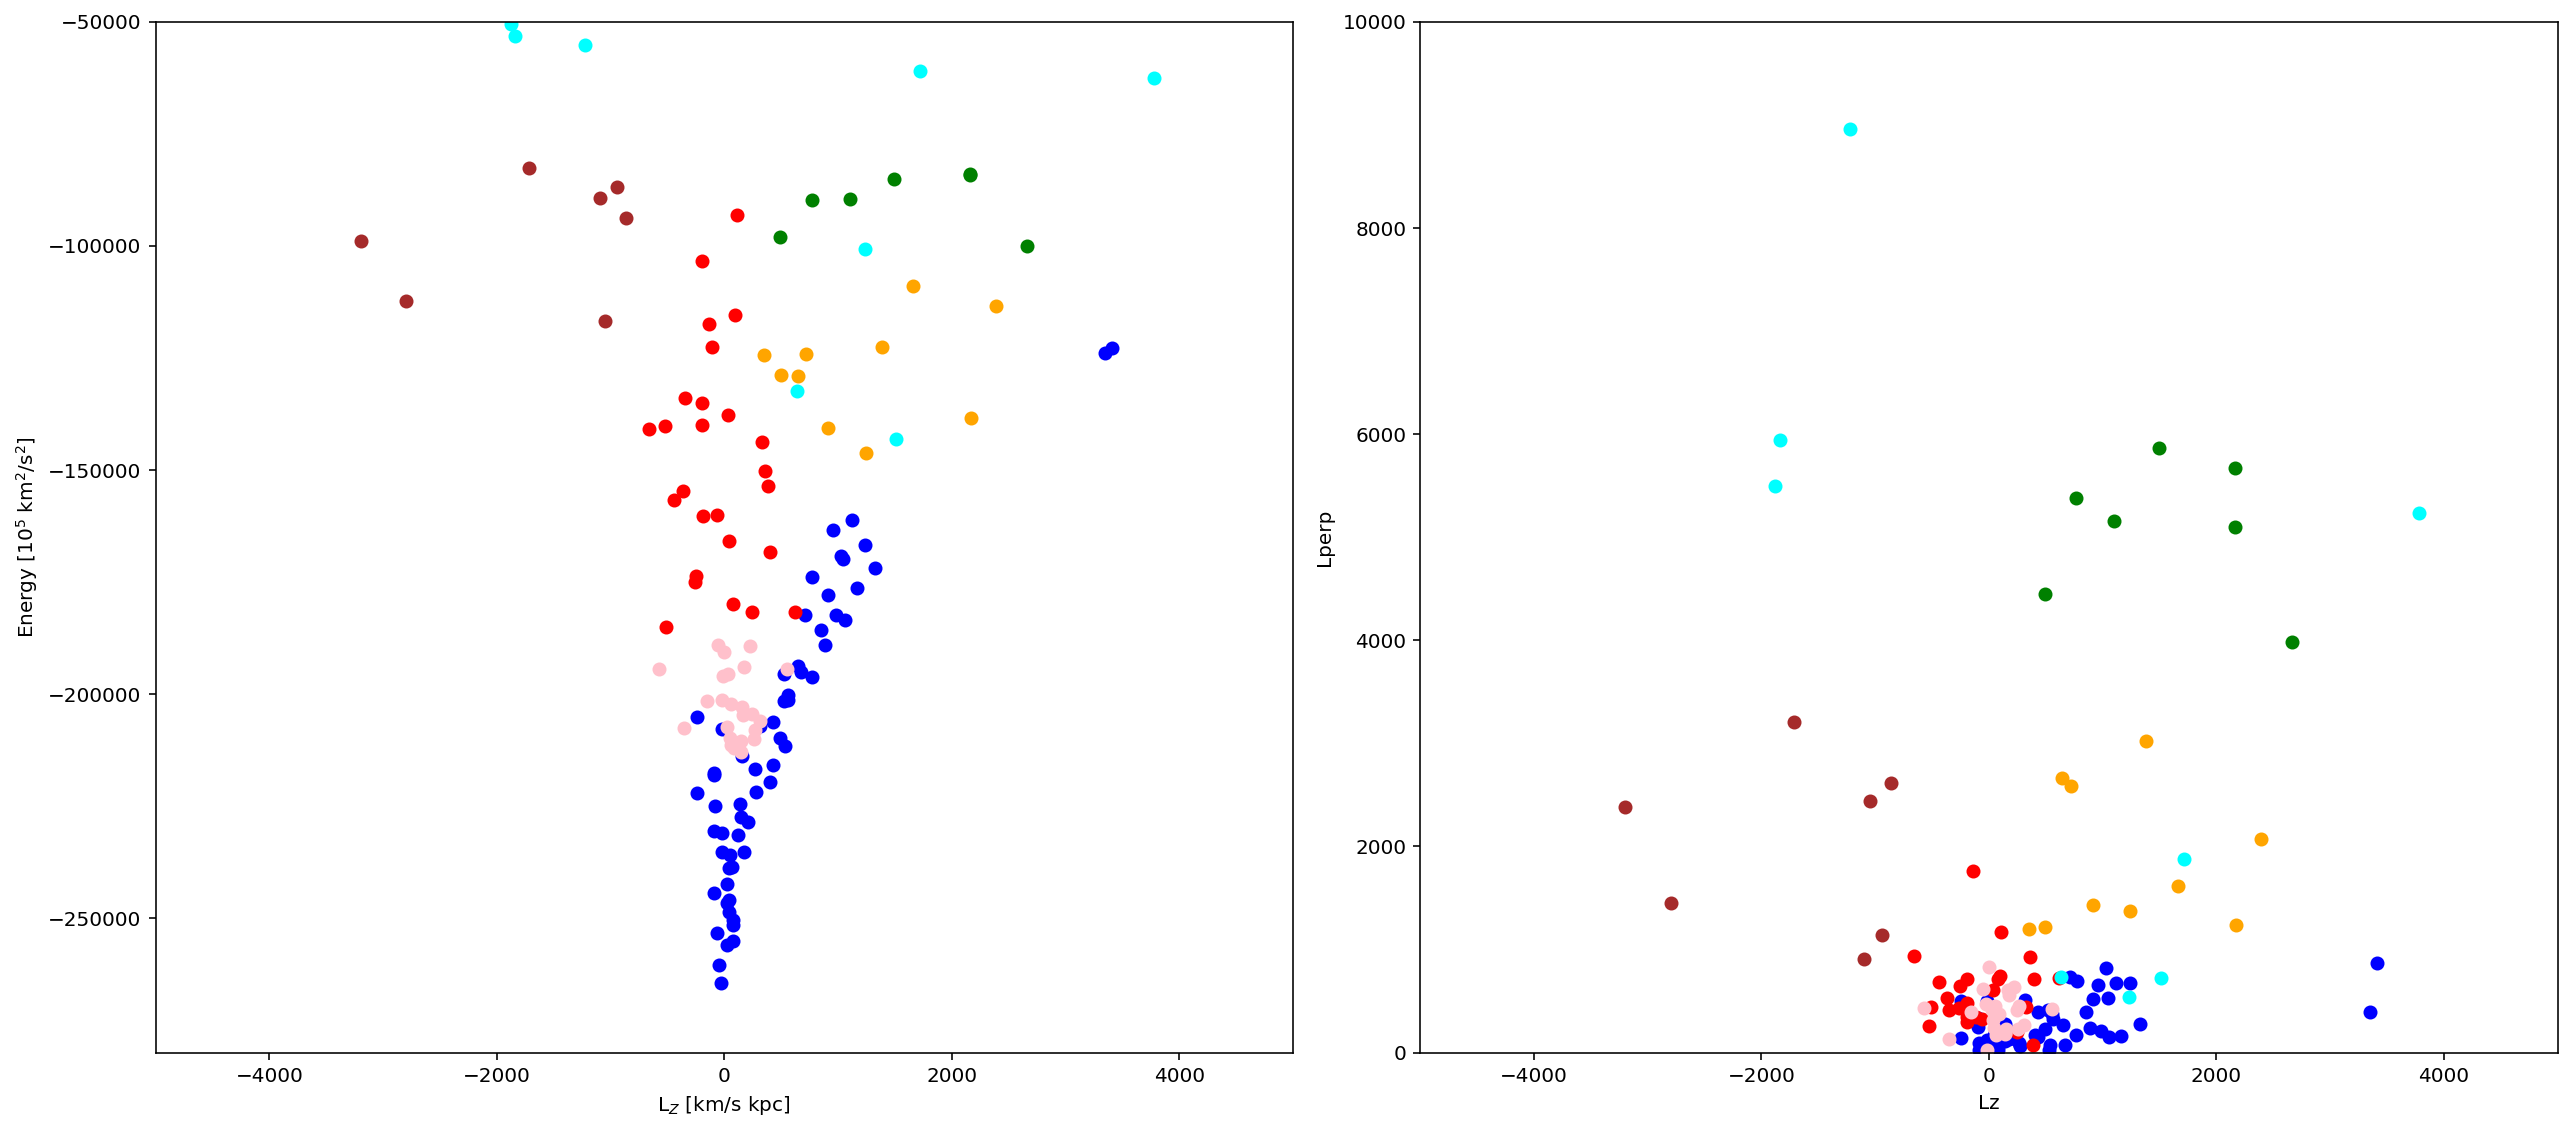

In [12]:
fig,axes = plt.subplots(ncols=2,figsize=(18,8))
ax = axes.flat

plt.sca(ax[0])
# ds.scatter('Lz','En',selection='~(amr)',marker='o',edgecolor='k',facecolor='none',lw=1)
# ds.scatter('Lz','En',selection='(amr)',c='k')

df.viz.scatter('Lz','En',selection='(bulge_apo)|(disk)',c='blue')
df.viz.scatter('Lz','En',selection='(H99)',c='orange')
df.viz.scatter('Lz','En',selection='(Sag)',c='green')
df.viz.scatter('Lz','En',selection='(GE)',c='red')
df.viz.scatter('Lz','En',selection='(high_E)',c='cyan')
df.viz.scatter('Lz','En',selection='(low_E)',c='pink')
df.viz.scatter('Lz','En',selection='(Seq_ext)',c='brown')






# plt.plot(-Lz_circ,En_circ,c='k')
# plt.plot(Lz_circ,En_circ,c='k')

# for f in [0.0,0.2,0.4,0.6,0.8]:
#     plt.plot(-Lz_circ*f,En_circ,ls='--',c='k',zorder=0)
#     plt.plot(Lz_circ*f,En_circ,ls='--',c='k',zorder=0)

plt.xlim(-5000,5000)
plt.ylim(-2.8e5,-.5e5)

plt.ylabel(Enlab)
plt.xlabel(Lzlab)



plt.sca(ax[1])
# ds.scatter('Lz','Lperp',selection='~(amr)',marker='o',edgecolor='k',facecolor='none',lw=1)
# ds.scatter('Lz','Lperp',selection='amr',c='k')
plt.ylabel(Lplab)
plt.xlabel(Lzlab)

df.viz.scatter('Lz','Lperp',selection='(bulge_apo)|(disk)',c='blue')
df.viz.scatter('Lz','Lperp',selection='(H99)',c='orange')
df.viz.scatter('Lz','Lperp',selection='(Sag)',c='green')
df.viz.scatter('Lz','Lperp',selection='(GE)',c='red')
df.viz.scatter('Lz','Lperp',selection='(high_E)',c='cyan')
df.viz.scatter('Lz','Lperp',selection='(low_E)',c='pink')
df.viz.scatter('Lz','Lperp',selection='(Seq_ext)',c='brown')


# xleft,xright,ybot,ytop = 0,4500,3700,6200
# plt.plot([xleft,xright,xright,xleft,xleft],[ybot,ybot,ytop,ytop,ybot],c='k',ls='--',lw=2,zorder=1)
# plt.text(xright-100,ytop-100,'Sag',size=20,ha='right',va='top')

# xleft,xright,ybot,ytop = 0,3000,1000,3200
# plt.plot([xleft,xright,xright,xleft,xleft],[ybot,ybot,ytop,ytop,ybot],c='k',ls='--',lw=2,zorder=1)
# plt.text(xright-100,ytop-100,'H99',size=20,ha='right',va='top')

    


plt.ylim(0,1.0e4)
plt.xlim(-5e3,5e3)
ax[0].xaxis.set_major_locator(plt.MultipleLocator(2000))
ax[1].xaxis.set_major_locator(plt.MultipleLocator(2000))







plt.tight_layout()
# plt.savefig('./IOM_gcs-wcircularity.jpeg',dpi=150,pad_inches=0.02,bbox_inches='tight')